Class distribution:
Category
ham     16948
spam      913
Name: count, dtype: int64

Message Length Statistics:
count    17861.000000
mean       910.719165
std       2025.782109
min          1.000000
25%         71.000000
50%        252.000000
75%        944.000000
max      31562.000000
Name: Message_Length, dtype: float64

Subject Length Statistics:
count    10299.000000
mean        29.051656
std         21.255442
min          1.000000
25%         14.000000
50%         24.000000
75%         40.000000
max        191.000000
Name: Subject_Length, dtype: float64

Exclamation Count Statistics:
count    17861.000000
mean         0.419461
std          2.047222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: Exclamation_Count, dtype: float64

Detailed Message Length Statistics:
Mean: 910.7191646604333
STD: 2025.782108891784
Min: 1
Median: 252.0
Max: 31562

Detailed Subject Length Statistics:
Mean: 29.051655500534032
STD: 21.25

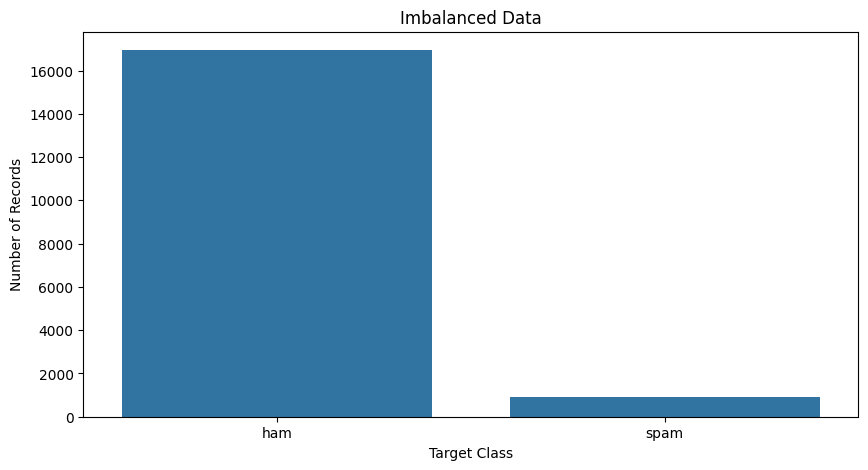

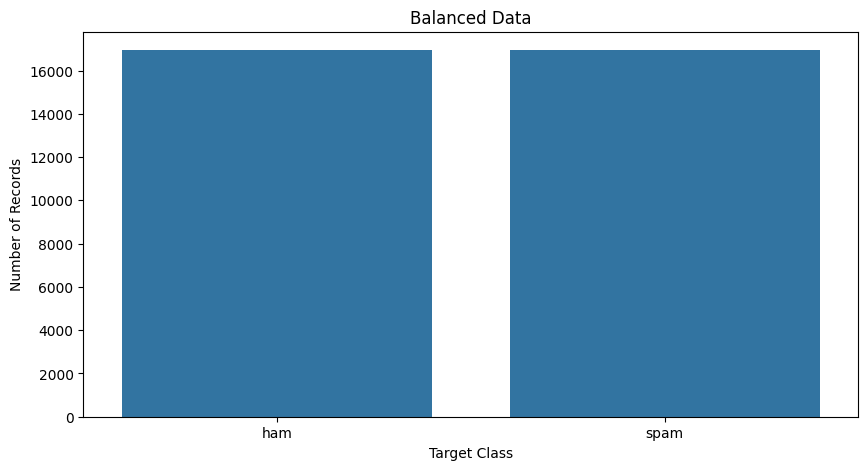

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.6403 - loss: 0.6246 - val_accuracy: 0.6757 - val_loss: 0.6226
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7104 - loss: 0.5735 - val_accuracy: 0.9095 - val_loss: 0.2423
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9458 - loss: 0.1549 - val_accuracy: 0.9517 - val_loss: 0.1285
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9815 - loss: 0.0579 - val_accuracy: 0.9624 - val_loss: 0.1165
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9884 - loss: 0.0436 - val_accuracy: 0.9676 - val_loss: 0.1016
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9928 - loss: 0.0252 - val_accuracy: 0.9620 - val_loss: 0.1349
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9923 - loss: 0.0267 - val_accuracy: 0.9646 - val_loss: 0.1297
Epoch 8/10
678

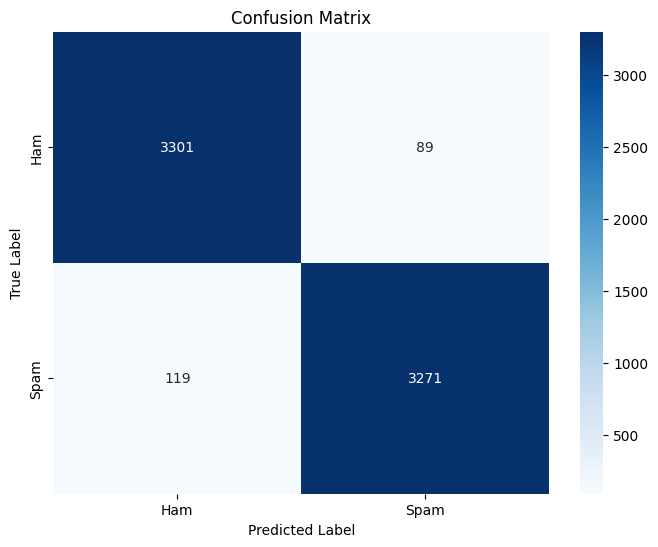

LSTM Model Parameters:
Embedding Dimension: 50
Max Length: 100
LSTM Units 1: 128
LSTM Units 2: 64
Dropout Rate: 0.2
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9693215339233038
Precision: 0.9735119047619047
Recall: 0.9648967551622419
Confusion Matrix:
 [[3301   89]
 [ 119 3271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3390
           1       0.97      0.96      0.97      3390

    accuracy                           0.97      6780
   macro avg       0.97      0.97      0.97      6780
weighted avg       0.97      0.97      0.97      6780



In [6]:
# LSTM Model with Statistical Information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Feature Engineering: Calculate message length, subject length, and exclamation count
combined_df['Message_Length'] = combined_df['Message'].str.len()
combined_df['Subject_Length'] = combined_df['Subject'].str.len()
combined_df['Exclamation_Count'] = combined_df['Message'].apply(lambda x: x.count('!'))

# Calculate statistics for Message_Length
message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Calculate statistics for Subject_Length
subject_length_stats = combined_df['Subject_Length'].describe()
print("\nSubject Length Statistics:")
print(subject_length_stats)

# Calculate statistics for Exclamation_Count
exclamation_count_stats = combined_df['Exclamation_Count'].describe()
print("\nExclamation Count Statistics:")
print(exclamation_count_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max for each feature
mean_message_length = combined_df['Message_Length'].mean()
std_message_length = combined_df['Message_Length'].std()
min_message_length = combined_df['Message_Length'].min()
median_message_length = combined_df['Message_Length'].median()
max_message_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_message_length}")
print(f"STD: {std_message_length}")
print(f"Min: {min_message_length}")
print(f"Median: {median_message_length}")
print(f"Max: {max_message_length}")

mean_subject_length = combined_df['Subject_Length'].mean()
std_subject_length = combined_df['Subject_Length'].std()
min_subject_length = combined_df['Subject_Length'].min()
median_subject_length = combined_df['Subject_Length'].median()
max_subject_length = combined_df['Subject_Length'].max()

print("\nDetailed Subject Length Statistics:")
print(f"Mean: {mean_subject_length}")
print(f"STD: {std_subject_length}")
print(f"Min: {min_subject_length}")
print(f"Median: {median_subject_length}")
print(f"Max: {max_subject_length}")

mean_exclamation_count = combined_df['Exclamation_Count'].mean()
std_exclamation_count = combined_df['Exclamation_Count'].std()
min_exclamation_count = combined_df['Exclamation_Count'].min()
median_exclamation_count = combined_df['Exclamation_Count'].median()
max_exclamation_count = combined_df['Exclamation_Count'].max()

print("\nDetailed Exclamation Count Statistics:")
print(f"Mean: {mean_exclamation_count}")
print(f"STD: {std_exclamation_count}")
print(f"Min: {min_exclamation_count}")
print(f"Median: {median_exclamation_count}")
print(f"Max: {max_exclamation_count}")

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("LSTM Model Parameters:")
print(f"Embedding Dimension: {50}")
print(f"Max Length: {max_len}")
print(f"LSTM Units 1: 128")
print(f"LSTM Units 2: 64")
print(f"Dropout Rate: 0.2")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Class distribution:
Category
ham     16948
spam      913
Name: count, dtype: int64

Message Length Statistics:
count    17861.000000
mean       910.719165
std       2025.782109
min          1.000000
25%         71.000000
50%        252.000000
75%        944.000000
max      31562.000000
Name: Message_Length, dtype: float64

Subject Length Statistics:
count    10299.000000
mean        29.051656
std         21.255442
min          1.000000
25%         14.000000
50%         24.000000
75%         40.000000
max        191.000000
Name: Subject_Length, dtype: float64

Exclamation Count Statistics:
count    17861.000000
mean         0.419461
std          2.047222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: Exclamation_Count, dtype: float64

Detailed Message Length Statistics:
Mean: 910.7191646604333
STD: 2025.782108891784
Min: 1
Median: 252.0
Max: 31562

Detailed Subject Length Statistics:
Mean: 29.051655500534032
STD: 21.25

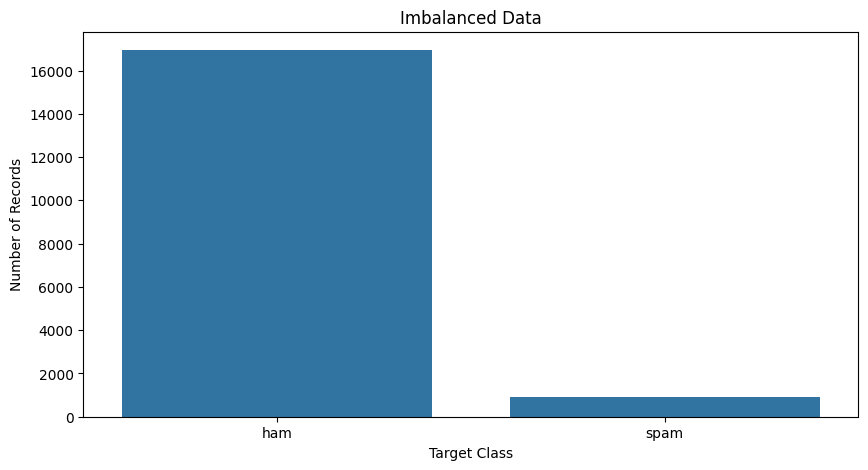

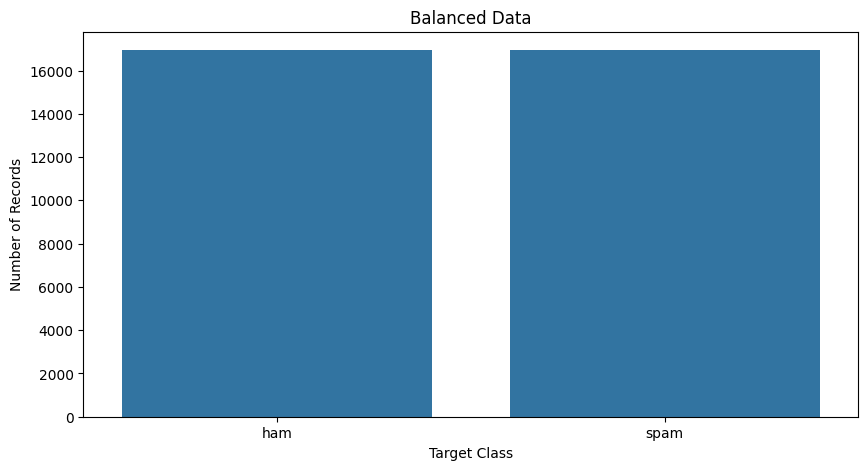

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10


c:\Users\abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8348 - loss: 0.3658 - val_accuracy: 0.9598 - val_loss: 0.1092
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9808 - loss: 0.0560 - val_accuracy: 0.9629 - val_loss: 0.1077
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9932 - loss: 0.0196 - val_accuracy: 0.9661 - val_loss: 0.1212
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9701 - val_loss: 0.1030
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9966 - loss: 0.0073 - val_accuracy: 0.9666 - val_loss: 0.1327
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9969 - loss: 0.0082 - val_accuracy: 0.9670 - val_loss: 0.1430
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9954 - loss: 0.0108 - val_accuracy: 0.9668 - val_loss: 0.1619
Epoch 8/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9969 - loss: 0.0085 - val_accuracy: 0.9670 - va

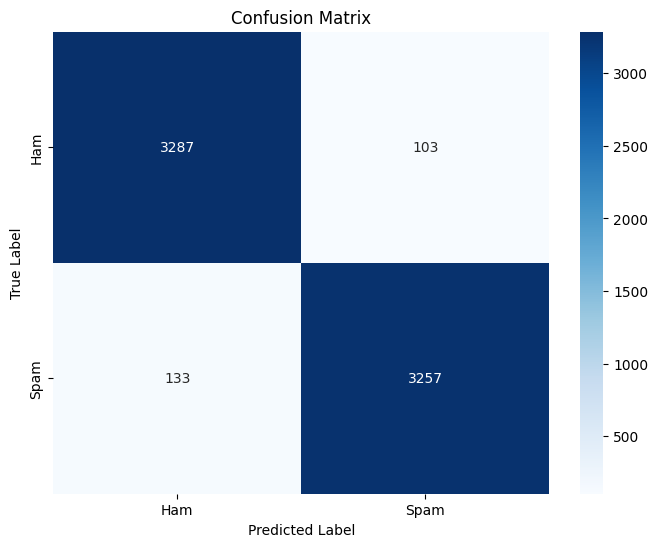

CNN Model Parameters:
Embedding Dimension: 50
Max Length: 100
Convolutional Filters: 128
Convolutional Kernel Size: 5
Pooling Size: 2
Dropout Rate: 0.2
Dense Units: 64
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9651917404129794
Precision: 0.9693452380952381
Recall: 0.9607669616519174
Confusion Matrix:
 [[3287  103]
 [ 133 3257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3390
           1       0.97      0.96      0.97      3390

    accuracy                           0.97      6780
   macro avg       0.97      0.97      0.97      6780
weighted avg       0.97      0.97      0.97      6780



In [7]:
# CNN Model with Statistical Information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Feature Engineering: Calculate message length, subject length, and exclamation count
combined_df['Message_Length'] = combined_df['Message'].str.len()
combined_df['Subject_Length'] = combined_df['Subject'].str.len()
combined_df['Exclamation_Count'] = combined_df['Message'].apply(lambda x: x.count('!'))

# Calculate statistics for Message_Length
message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Calculate statistics for Subject_Length
subject_length_stats = combined_df['Subject_Length'].describe()
print("\nSubject Length Statistics:")
print(subject_length_stats)

# Calculate statistics for Exclamation_Count
exclamation_count_stats = combined_df['Exclamation_Count'].describe()
print("\nExclamation Count Statistics:")
print(exclamation_count_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max for each feature
mean_message_length = combined_df['Message_Length'].mean()
std_message_length = combined_df['Message_Length'].std()
min_message_length = combined_df['Message_Length'].min()
median_message_length = combined_df['Message_Length'].median()
max_message_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_message_length}")
print(f"STD: {std_message_length}")
print(f"Min: {min_message_length}")
print(f"Median: {median_message_length}")
print(f"Max: {max_message_length}")

mean_subject_length = combined_df['Subject_Length'].mean()
std_subject_length = combined_df['Subject_Length'].std()
min_subject_length = combined_df['Subject_Length'].min()
median_subject_length = combined_df['Subject_Length'].median()
max_subject_length = combined_df['Subject_Length'].max()

print("\nDetailed Subject Length Statistics:")
print(f"Mean: {mean_subject_length}")
print(f"STD: {std_subject_length}")
print(f"Min: {min_subject_length}")
print(f"Median: {median_subject_length}")
print(f"Max: {max_subject_length}")

mean_exclamation_count = combined_df['Exclamation_Count'].mean()
std_exclamation_count = combined_df['Exclamation_Count'].std()
min_exclamation_count = combined_df['Exclamation_Count'].min()
median_exclamation_count = combined_df['Exclamation_Count'].median()
max_exclamation_count = combined_df['Exclamation_Count'].max()

print("\nDetailed Exclamation Count Statistics:")
print(f"Mean: {mean_exclamation_count}")
print(f"STD: {std_exclamation_count}")
print(f"Min: {min_exclamation_count}")
print(f"Median: {median_exclamation_count}")
print(f"Max: {max_exclamation_count}")

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the CNN model
model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("CNN Model Parameters:")
print(f"Embedding Dimension: {embedding_dim}")
print(f"Max Length: {max_len}")
print(f"Convolutional Filters: 128")
print(f"Convolutional Kernel Size: 5")
print(f"Pooling Size: 2")
print(f"Dropout Rate: 0.2")
print(f"Dense Units: 64")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Message Length Statistics:
count    17861.000000
mean       910.719165
std       2025.782109
min          1.000000
25%         71.000000
50%        252.000000
75%        944.000000
max      31562.000000
Name: Message_Length, dtype: float64

Subject Length Statistics:
count    10299.000000
mean        29.051656
std         21.255442
min          1.000000
25%         14.000000
50%         24.000000
75%         40.000000
max        191.000000
Name: Subject_Length, dtype: float64

Exclamation Count Statistics:
count    17861.000000
mean         0.419461
std          2.047222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: Exclamation_Count, dtype: float64

Detailed Message Length Statistics:
Mean: 910.7191646604333
STD: 2025.782108891784
Min: 1
Median: 252.0
Max: 31562

Detailed Subject Length Statistics:
Mean: 29.051655500534032
STD: 21.255441580527826
Min: 1.0
Median: 24.0
Max: 191.0

Detailed Exclamation Count Statisti

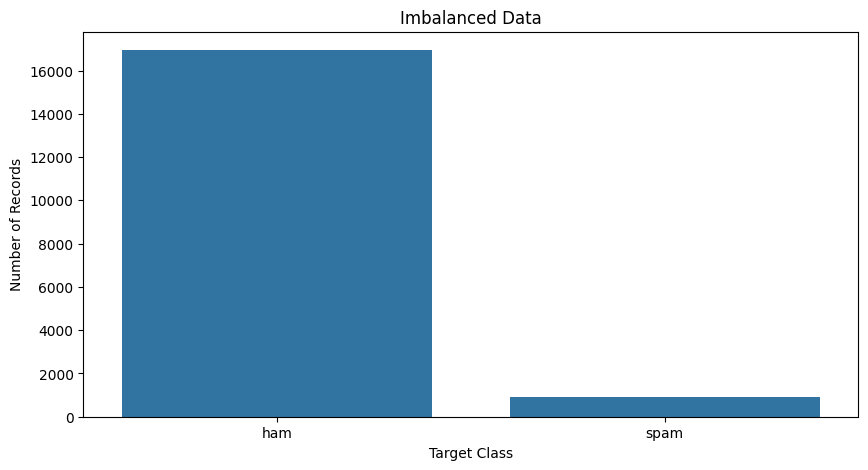

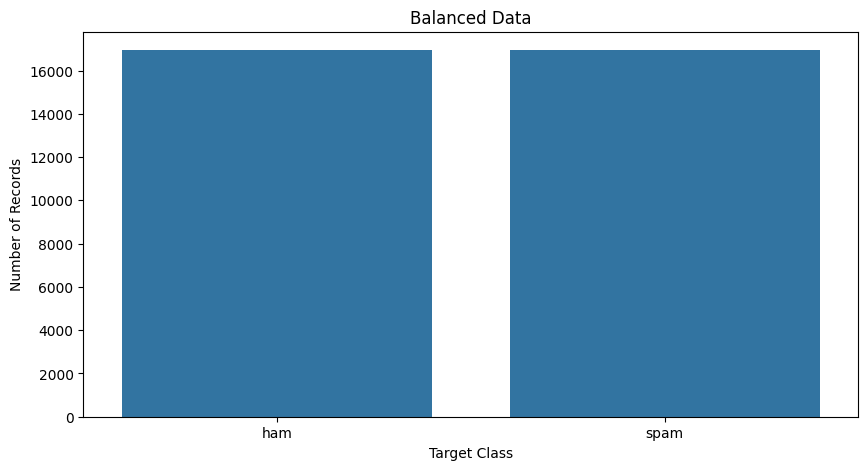

Training set distribution: [13558 13558]
Test set distribution: [3390 3390]
Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6621 - loss: 0.6150 - val_accuracy: 0.4941 - val_loss: 0.6947
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6256 - loss: 0.6071 - val_accuracy: 0.9251 - val_loss: 0.2081
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9476 - loss: 0.1574 - val_accuracy: 0.9663 - val_loss: 0.0978
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.9852 - loss: 0.0508 - val_accuracy: 0.9714 - val_loss: 0.0879
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9914 - loss: 0.0323 - val_accuracy: 0.9688 - val_loss: 0.0950
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9711 - val_loss: 0.1111
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9672 - val_loss: 0.1369
Epoch 8/10
678

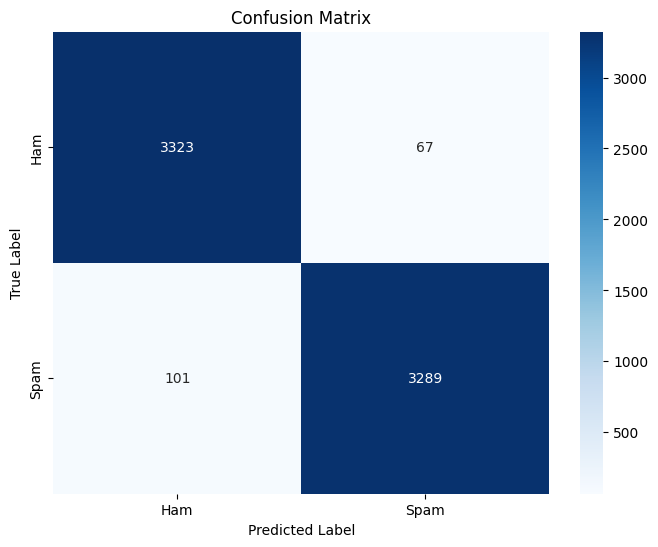

Hybrid Model Parameters:
Embedding Dimension: 50
Max Length: 100
Convolutional Filters: 128
Convolutional Kernel Size: 5
Pooling Size: 2
LSTM Units 1: 128
LSTM Units 2: 64
Dropout Rate: 0.2
Dense Units: 64
Optimizer: Adam
Loss: Binary Crossentropy
Batch Size: 32
Epochs: 10

Accuracy: 0.9752212389380531
Precision: 0.9800357568533969
Recall: 0.9702064896755163
Confusion Matrix:
 [[3323   67]
 [ 101 3289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3390
           1       0.98      0.97      0.98      3390

    accuracy                           0.98      6780
   macro avg       0.98      0.98      0.98      6780
weighted avg       0.98      0.98      0.98      6780



In [2]:
# hybrid Model with Statistical Information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned email spam dataset
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Feature Engineering: Calculate message length, subject length, and exclamation count
combined_df['Message_Length'] = combined_df['Message'].str.len()
combined_df['Subject_Length'] = combined_df['Subject'].str.len()
combined_df['Exclamation_Count'] = combined_df['Message'].apply(lambda x: x.count('!'))

# Calculate and print statistics for Message_Length
message_length_stats = combined_df['Message_Length'].describe()
print("\nMessage Length Statistics:")
print(message_length_stats)

# Calculate and print statistics for Subject_Length
subject_length_stats = combined_df['Subject_Length'].describe()
print("\nSubject Length Statistics:")
print(subject_length_stats)

# Calculate and print statistics for Exclamation_Count
exclamation_count_stats = combined_df['Exclamation_Count'].describe()
print("\nExclamation Count Statistics:")
print(exclamation_count_stats)

# Additionally, calculate and print Mean, STD, Min, Median, Max for each feature
mean_message_length = combined_df['Message_Length'].mean()
std_message_length = combined_df['Message_Length'].std()
min_message_length = combined_df['Message_Length'].min()
median_message_length = combined_df['Message_Length'].median()
max_message_length = combined_df['Message_Length'].max()

print("\nDetailed Message Length Statistics:")
print(f"Mean: {mean_message_length}")
print(f"STD: {std_message_length}")
print(f"Min: {min_message_length}")
print(f"Median: {median_message_length}")
print(f"Max: {max_message_length}")

mean_subject_length = combined_df['Subject_Length'].mean()
std_subject_length = combined_df['Subject_Length'].std()
min_subject_length = combined_df['Subject_Length'].min()
median_subject_length = combined_df['Subject_Length'].median()
max_subject_length = combined_df['Subject_Length'].max()

print("\nDetailed Subject Length Statistics:")
print(f"Mean: {mean_subject_length}")
print(f"STD: {std_subject_length}")
print(f"Min: {min_subject_length}")
print(f"Median: {median_subject_length}")
print(f"Max: {max_subject_length}")

mean_exclamation_count = combined_df['Exclamation_Count'].mean()
std_exclamation_count = combined_df['Exclamation_Count'].std()
min_exclamation_count = combined_df['Exclamation_Count'].min()
median_exclamation_count = combined_df['Exclamation_Count'].median()
max_exclamation_count = combined_df['Exclamation_Count'].max()

print("\nDetailed Exclamation Count Statistics:")
print(f"Mean: {mean_exclamation_count}")
print(f"STD: {std_exclamation_count}")
print(f"Min: {min_exclamation_count}")
print(f"Median: {median_exclamation_count}")
print(f"Max: {max_exclamation_count}")

# Check class distribution
class_counts = combined_df['Category'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution for imbalanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=combined_df)
plt.title('Imbalanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Define the parameters for tokenization and padding
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['Message'])
sequences = tokenizer.texts_to_sequences(combined_df['Message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels
labels = combined_df['Category'].apply(lambda x: 1 if x == 'spam' else 0).values

# Oversample the minority class using SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(padded_sequences, labels)

# Convert oversampled labels back to DataFrame for plotting
resampled_df = pd.DataFrame({'Category': y_res})
resampled_df['Category'] = resampled_df['Category'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Plot class distribution for balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=resampled_df)
plt.title('Balanced Data')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Check distribution in the train/test sets
print("Training set distribution:", np.bincount(y_train))
print("Test set distribution:", np.bincount(y_test))

# Build the Hybrid LSTM-CNN model
model_hybrid = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with oversampled data
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model_hybrid.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the results
print("Hybrid Model Parameters:")
print(f"Embedding Dimension: {embedding_dim}")
print(f"Max Length: {max_len}")
print(f"Convolutional Filters: 128")
print(f"Convolutional Kernel Size: 5")
print(f"Pooling Size: 2")
print(f"LSTM Units 1: 128")
print(f"LSTM Units 2: 64")
print(f"Dropout Rate: 0.2")
print(f"Dense Units: 64")
print(f"Optimizer: Adam")
print(f"Loss: Binary Crossentropy")
print(f"Batch Size: 32")
print(f"Epochs: 10")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


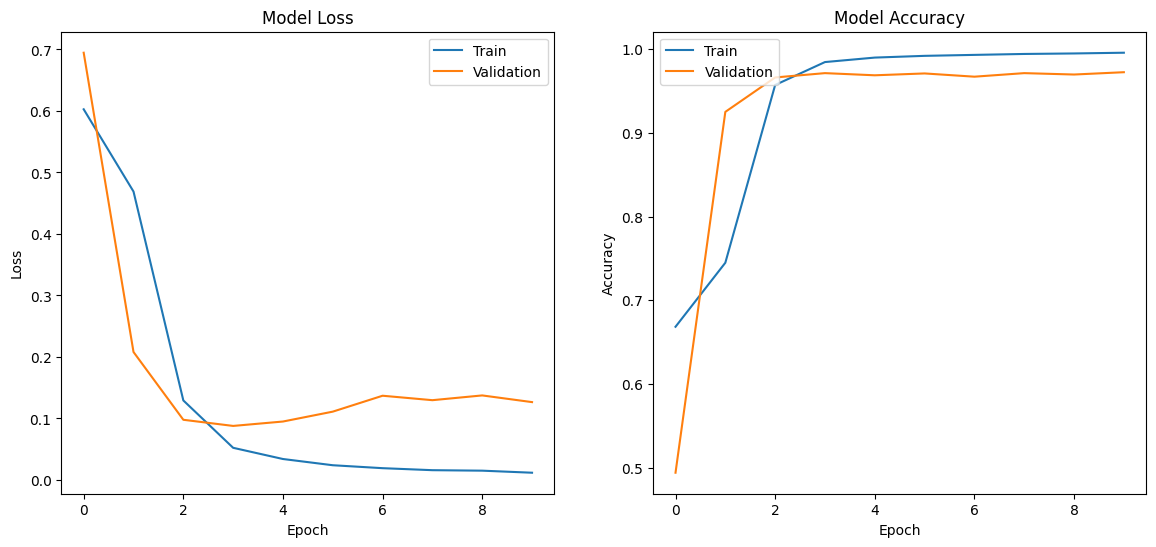

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hybrid.history['loss'])
plt.plot(history_hybrid.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_hybrid.history['accuracy'])
plt.plot(history_hybrid.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


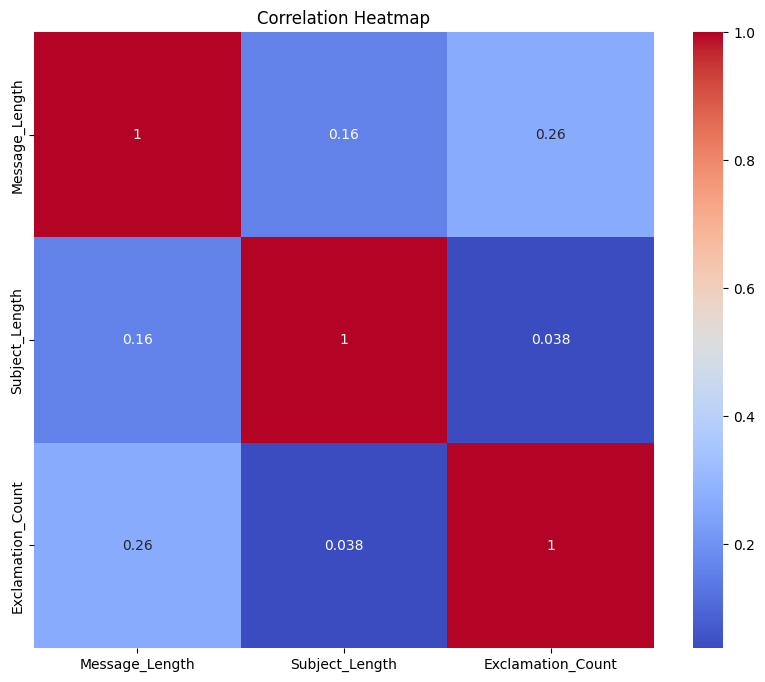

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
emailspam_df = pd.read_csv('emailspam with subject line.csv', low_memory=False)
enron_df = pd.read_csv('enron_05_17_2015_with_labels_v2.csv', low_memory=False)

# Assuming 'content' in emailspam_df and 'Message' in enron_df are the columns with message content
emailspam_df.rename(columns={'content': 'Message'}, inplace=True)

# Ensure all entries in 'Message' column are strings
emailspam_df['Message'] = emailspam_df['Message'].astype(str)
enron_df['Message'] = enron_df['Message'].astype(str)

# Filter the datasets for relevant categories
emailspam_df_clean = emailspam_df[emailspam_df['Category'].isin(['ham', 'spam'])]
enron_df_clean = enron_df[enron_df['Category'].isin(['ham', 'spam'])]

# Combine the datasets
combined_df = pd.concat([emailspam_df_clean, enron_df_clean])

# Feature Engineering: Calculate message length, subject length, and exclamation count
combined_df['Message_Length'] = combined_df['Message'].str.len()
combined_df['Subject_Length'] = combined_df['Subject'].str.len()
combined_df['Exclamation_Count'] = combined_df['Message'].apply(lambda x: x.count('!'))

# Calculate correlations
corr = combined_df[['Message_Length', 'Subject_Length', 'Exclamation_Count']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


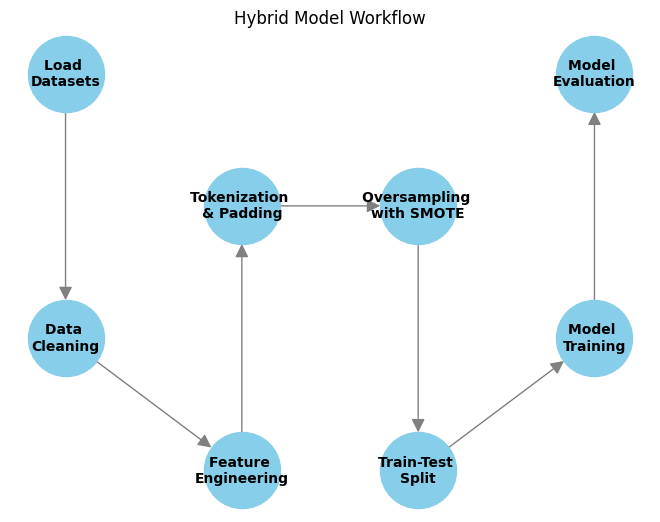

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each step in the workflow
G.add_node('A', label='Load \nDatasets')
G.add_node('B', label='Data \nCleaning')
G.add_node('C', label='Feature \nEngineering')
G.add_node('D', label='Tokenization \n& Padding')
G.add_node('E', label='Oversampling \nwith SMOTE')
G.add_node('F', label='Train-Test \nSplit')
G.add_node('G', label='Model \nTraining')
G.add_node('H', label='Model \nEvaluation')

# Add edges to represent the workflow
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H')])

# Define positions for all nodes
pos = {
    'A': (0, 1),
    'B': (0, .5),
    'C': (3, 0.25),
    'D': (3,.75),
    'E': (6, .75),
    'F': (6,0.25),
    'G': (9,0.5),
    'H': (9,1)
}

# Draw the graph with specific node positions
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

# Display the graph
plt.title("Hybrid Model Workflow")
plt.show()
